## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [17]:
train, test = keras.datasets.cifar10.load_data()

In [18]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = (x - x.min())/(x.max()-x.min()) - 0.5
    if flatten:
        x = x.reshape(len(x),-1)
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [19]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [20]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32, 16]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 16)                528       
__________

In [21]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [22]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [23]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 12s 233us/step - loss: 1.7986 - acc: 0.3661 - val_loss: 1.5983 - val_acc: 0.4392
Epoch 2/100
50000/50000 [==============================] - 9s 178us/step - loss: 1.5212 - acc: 0.4660 - val_loss: 1.4733 - val_acc: 0.4841
Epoch 3/100
50000/50000 [==============================] - 9s 172us/step - loss: 1.3924 - acc: 0.5085 - val_loss: 1.4185 - val_acc: 0.5029
Epoch 4/100
50000/50000 [==============================] - 8s 169us/step - loss: 1.2837 - acc: 0.5479 - val_loss: 1.3876 - val_acc: 0.5178
Epoch 5/100
50000/50000 [==============================] - 9s 171us/step - loss: 1.2081 - acc: 0.5738 - val_loss: 1.3742 - val_acc: 0.5223
Epoch 6/100
50000/50000 [==============================] - 8s 166us/step - loss: 1.1220 - acc: 0.6031 - val_loss: 1.3606 - val_acc: 0.5298
Epoch 7/100
50000/50000 [==============================] - 8s 170us/step - loss: 1.0447 - acc: 0.6337 - val_loss: 1

50000/50000 [==============================] - 8s 166us/step - loss: 0.0820 - acc: 0.9720 - val_loss: 3.7121 - val_acc: 0.5282
Epoch 60/100
50000/50000 [==============================] - 8s 163us/step - loss: 0.1027 - acc: 0.9661 - val_loss: 3.6898 - val_acc: 0.5317
Epoch 61/100
50000/50000 [==============================] - 8s 167us/step - loss: 0.0963 - acc: 0.9679 - val_loss: 3.7115 - val_acc: 0.5270
Epoch 62/100
50000/50000 [==============================] - 8s 167us/step - loss: 0.0977 - acc: 0.9681 - val_loss: 3.6021 - val_acc: 0.5322
Epoch 63/100
50000/50000 [==============================] - 9s 176us/step - loss: 0.1013 - acc: 0.9670 - val_loss: 3.5520 - val_acc: 0.5328
Epoch 64/100
50000/50000 [==============================] - 9s 179us/step - loss: 0.0732 - acc: 0.9754 - val_loss: 3.7353 - val_acc: 0.5334
Epoch 65/100
50000/50000 [==============================] - 9s 174us/step - loss: 0.0928 - acc: 0.9696 - val_loss: 3.6749 - val_acc: 0.5302
Epoch 66/100
50000/50000 [=======

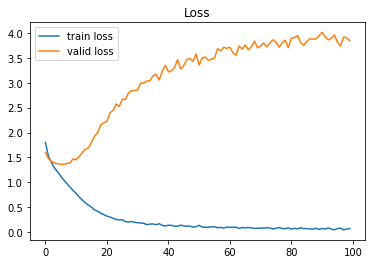

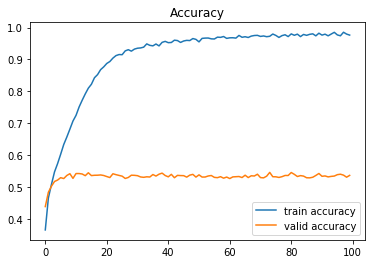

In [24]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()